In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [2]:
raw_data_path = "..\\..\\data\\raw\\smedebtsu.xlsx"
raw_data = pd.read_excel(raw_data_path)
raw_data.head()

,Date,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK,totalU
0,2013-10-13 00:00:00,13,10,2013,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00,228007.01
1,2013-11-13 00:00:00,13,11,2013,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09,227988.31
2,2013-12-10 00:00:00,10,12,2013,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00,265199.00
3,2014-01-23 00:00:00,23,1,2014,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00,299453.00
4,2014-03-05 00:00:00,5,3,2014,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00,290103.00


In [3]:
# Descriptive statistics
raw_data.describe()

,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK,totalU
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,13.642857,6.845238,2017.761905,47760.977262,70218.431905,1660.853333,1116.107143,166849.570119,36955.791190,25128.877976,45117.856667,8787.585714,43369.896429,18465.096310,465431.044048
std,8.592015,3.571959,2.923190,44215.335442,49127.181782,4089.376468,2043.098987,93616.346642,56284.686264,23544.317201,38578.120510,8169.819569,53562.873215,18300.389544,142595.808215
min,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,227988.310000
25%,6.000000,4.000000,2015.000000,0.000000,17176.500000,0.000000,0.000000,100476.750000,0.000000,3440.250000,0.000000,855.250000,0.000000,0.000000,350633.250000
50%,13.000000,7.000000,2017.000000,33935.000000,87571.000000,0.000000,0.000000,159967.500000,0.000000,11951.500000,48081.000000,6721.000000,4400.000000,14157.000000,427691.000000
75%,20.250000,10.000000,2020.000000,76931.250000,111017.500000,0.000000,1100.000000,245492.500000,61763.240000,48760.250000,78925.000000,14154.250000,105349.750000,33756.250000,591393.247500
max,31.000000,12.000000,2023.000000,138754.000000,146476.000000,14300.000000,7986.000000,352099.000000,176000.000000,70059.000000,121033.000000,29700.000000,143000.000000,53350.000000,771441.000000


   # Exploratory Data
   Overall goal:
 - Get an understanding of variables and find out important variables
 - Check duplicates, missing values, or incorrect data

## Data Preprocessing
- Check missing values/ duplicates/ outlier points

In [4]:
# Size of data
print(f"The size of the data: {raw_data.shape}")

The sỉze of the data: (84, 16)


In [5]:
#check datatype of data
print(f"Datatype of data")
raw_data.dtypes

Datatype of data


Date        object
Day          int64
Month        int64
Year         int64
LenderA    float64
LenderB    float64
LenderC    float64
LenderD      int64
LenderE    float64
LenderF    float64
LenderG    float64
LenderH    float64
LenderI    float64
LenderJ    float64
LenderK    float64
totalU     float64
dtype: object

In [6]:
# Convert datatype of LenderD column to float64 
raw_data['LenderD'] = raw_data['LenderD'].astype(float)
raw_data.dtypes

Date        object
Day          int64
Month        int64
Year         int64
LenderA    float64
LenderB    float64
LenderC    float64
LenderD    float64
LenderE    float64
LenderF    float64
LenderG    float64
LenderH    float64
LenderI    float64
LenderJ    float64
LenderK    float64
totalU     float64
dtype: object

The data have the "LenderD" column having a different data type to others. I change int to float of this column data type

### Check missing values


In [7]:
# Missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     84 non-null     object 
 1   Day      84 non-null     int64  
 2   Month    84 non-null     int64  
 3   Year     84 non-null     int64  
 4   LenderA  84 non-null     float64
 5   LenderB  84 non-null     float64
 6   LenderC  84 non-null     float64
 7   LenderD  84 non-null     float64
 8   LenderE  84 non-null     float64
 9   LenderF  84 non-null     float64
 10  LenderG  84 non-null     float64
 11  LenderH  84 non-null     float64
 12  LenderI  84 non-null     float64
 13  LenderJ  84 non-null     float64
 14  LenderK  84 non-null     float64
 15  totalU   84 non-null     float64
dtypes: float64(12), int64(3), object(1)
memory usage: 10.6+ KB


### Check duplicates

In [8]:
#Remove timestamp and return Date to check duplicate
raw_data['Date_time'] = pd.to_datetime(raw_data[['Day', 'Month', 'Year']])
data = raw_data.drop(columns=['Date', 'Day', 'Month', 'Year'])
data.head()

,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK,totalU,Date_time
0,74349.0,70109.93,11477.84,4884.0,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00,228007.01,2013-10-13
1,73535.0,66083.05,9607.84,5170.0,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09,227988.31,2013-11-13
2,71027.0,93500.00,14300.00,4950.0,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00,265199.00,2013-12-10
3,0.0,15741.00,14300.00,3300.0,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00,299453.00,2014-01-23
4,0.0,14850.00,13200.00,3476.0,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00,290103.00,2014-03-05


In [9]:
# Show the number of duplicated observations
print(f"The number of duplicated values in the dataset: {data.duplicated().sum()}")

The number of duplicated values in the dataset: 0


In [10]:
# Sort by Date_time
data = data.sort_values(by='Date_time')

## Data Visualization
- Figure 1: Display the development of average debts over the years
- Figure 2: Show the actual total debts (from all lenders) on every month of the year over the past 10 years

### Visualize the average debts

In [11]:
df_average_debts = data.copy()
df_average_debts.head()

,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK,totalU,Date_time
0,74349.0,70109.93,11477.84,4884.0,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00,228007.01,2013-10-13
1,73535.0,66083.05,9607.84,5170.0,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09,227988.31,2013-11-13
2,71027.0,93500.00,14300.00,4950.0,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00,265199.00,2013-12-10
3,0.0,15741.00,14300.00,3300.0,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00,299453.00,2014-01-23
4,0.0,14850.00,13200.00,3476.0,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00,290103.00,2014-03-05


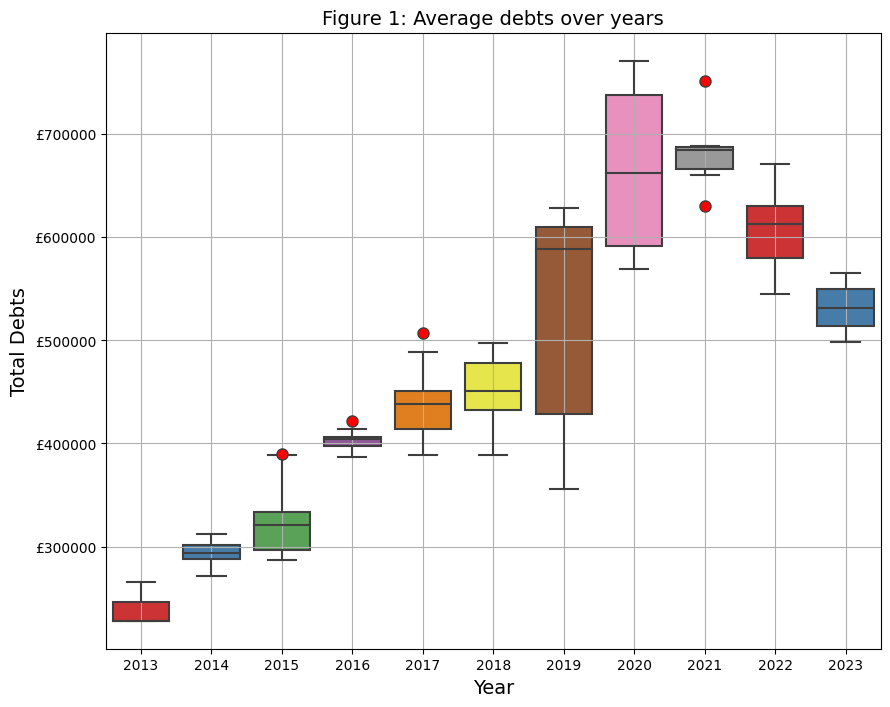

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(
    x=df_average_debts['Date_time'].dt.year, 
    y=df_average_debts['totalU'],
    palette='Set1',
    flierprops=dict(marker='o', markerfacecolor='red', markersize=8)
)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Debts', fontsize=14)
plt.title('Figure 1: Average debts over years', fontsize=14)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('£%d'))
plt.grid(True)
plt.show()

In [13]:
df_total_debts = data[['Date_time', 'totalU']]
df_total_debts.head()

,Date_time,totalU
0,2013-10-13,228007.01
1,2013-11-13,227988.31
2,2013-12-10,265199.00
3,2014-01-23,299453.00
4,2014-03-05,290103.00


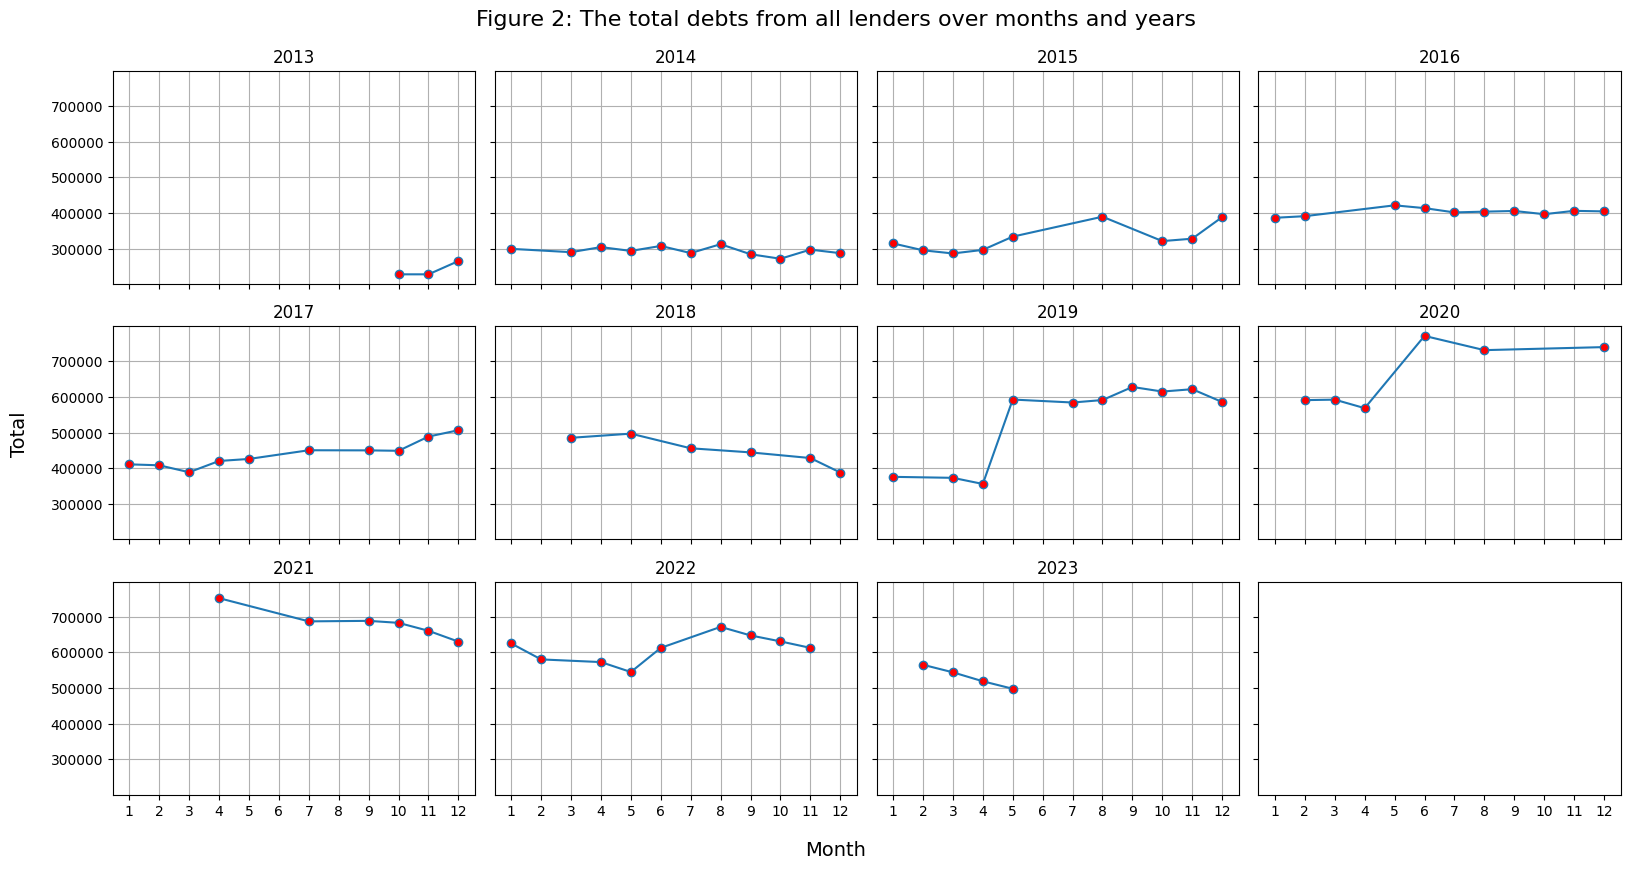

In [14]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(16, 8))
ax = ax.ravel()

for i, year in enumerate(range(2013, 2024)):
    year_data = df_total_debts[df_total_debts['Date_time'].dt.year == year]
    # Plot the data on the corresponding subplot
    ax[i].plot(year_data['Date_time'].dt.month, year_data['totalU'], marker='o', markerfacecolor='red')
    ax[i].grid(True)
    ax[i].set_title(year)
    ax[i].set_xticks(range(1, 13))
    

    
# Adjust the spacing between subplots
fig.tight_layout()

# Set labels
fig.text(0.5, -0.02, 'Month', ha='center', va='center', fontsize=14)
fig.text(-0.01, 0.5, 'Total', ha='center', va='center', rotation='vertical', fontsize=14)

fig.suptitle('Figure 2: The total debts from all lenders over months and years', fontsize=16, y=1.03)
plt.show()

In [15]:
# Checking folder exists
def check_dir_exists(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [16]:
# Save processed data 
save_path = '../../data/processed'
check_dir_exists(save_path)

data.to_csv(os.path.join(save_path, 'processed_smedebtsu.csv'), index=False)